# Building a Multiple Linear Regression Model from Scratch

## Auto-mpg(miles per gallon) Dataset from Kaggle

In [1]:
path = 'C:\\Users\\Harikrishna\\.cache\\kagglehub\\datasets\\uciml\\autompg-dataset\\versions\\3\\auto-mpg.csv'

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

data = pd.read_csv(path)

In [4]:
data.shape

(398, 9)

In [5]:
data.head

<bound method NDFrame.head of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1          

In [6]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [8]:
data.drop('car name', axis=1, inplace = True)

In [9]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [10]:
data.replace('?', np.nan, inplace = True)

In [11]:
data = data.dropna()

In [12]:
data.shape

(392, 8)

In [13]:
data.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3          

In [14]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### weight parameter has the highest correlation with mpg, so we consider weight parameter as input feature

In [15]:
X = data.drop(columns=['mpg'])
y = data['mpg'].to_numpy()

## Normalizing input feature car weight

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled.shape

(392, 7)

## Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Computing the gradient

In [19]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape  # m = number of examples, n = number of features
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    # Loop over each example
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        error = f_wb - y[i]
        dj_db += error
        
        for j in range(n):
            dj_dw[j] += error * X[i, j]

    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


## Gradient Descent

In [20]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    """
    Performs gradient descent(batch) to learn w and b.

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  initial weights of the model      
      b : (scalar)              initial bias of the model
      alpha : (float)           learning rate
      num_iters : (int)         number of iterations for gradient descent

    Returns:
      w : (ndarray Shape (n,))  updated weights
      b : (scalar)              updated bias
      J_history : (list)        cost value at each iteration
    """
    m = len(y)
    J_history = []
    weights_and_bias = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        weights_and_bias.append((w,b))

        # Compute Mean Squared Error cost function 
        cost = (1 / (2 * m)) * np.sum((np.dot(X, w) + b - y) ** 2)
        J_history.append(cost)

    return w, b, J_history, weights_and_bias

In [35]:
w = np.zeros(X_scaled.shape[1])
b = 0
alpha = 0.1
num_iters = 100

In [36]:
w, b, costs, weights_and_bias = gradient_descent(X_train, y_train, w, b, alpha, num_iters)

In [37]:
print(X_train.shape)
print(y_train.shape)

(313, 7)
(313,)


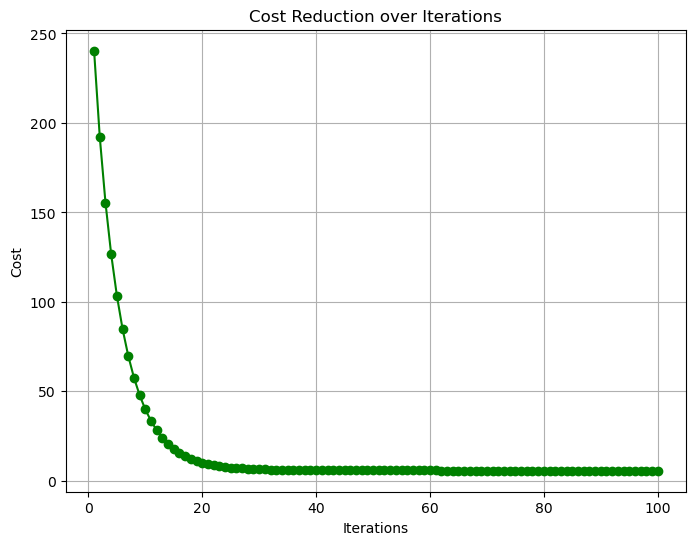

In [38]:
# 2. Plot Cost vs. Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(costs) + 1), costs, marker='o', color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations')
plt.grid()
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_train_pred = np.dot(X_train, w) + b

# Metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print results
print("========Training Error =========")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


========Training Error =========
Mean Absolute Error (MAE): 2.542731233520442
Mean Squared Error (MSE): 11.343763817703216
R-squared (R^2): 0.8202248836764572


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_test_pred = np.dot(X_test,w) + b

# Metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 2.508590031192014
Mean Squared Error (MSE): 11.610589754195427
R-squared (R^2): 0.7725223926295783
